# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment


In [ ]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="C:/Users/tonys/Value-based-methods/p1_navigation/Banana_Windows_x86_64/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch


import time
from collections import deque
import random
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="C:/Users/tonys/Value-based-methods/p1_navigation/Banana_Windows_x86_64/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
print(action_size)
state_size = len(state)
print(state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


4
37


# Scenario 1 DQN with 2 hidden NN layers, 64 nodes, epsilon start 1.0, decay 0.995

In [3]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='dqn'):

    if agent_type == "dqn":
        from dqn_agent_dqn import Agent
    elif agent_type == "double_dqn":
        from dqn_agent_ddqn import Agent   
    elif agent_type == 'duel_dqn':
        from dqn_agent_duling_dqn import Agent
    
    
    agent = Agent(state_size=state_size, action_size=action_size, seed=1)
    
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):
            action = np.int32(agent.act(state, eps)) # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished                      
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.001:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), agent_type + '_checkpoint.pth')
            break
    return scores



Episode 50	Average Score: 0.42
Episode 100	Average Score: 0.98
Episode 150	Average Score: 2.49
Episode 200	Average Score: 4.60
Episode 250	Average Score: 6.33
Episode 300	Average Score: 7.51
Episode 350	Average Score: 9.42
Episode 400	Average Score: 10.66
Episode 450	Average Score: 11.59
Episode 500	Average Score: 13.02

Environment solved in 400 episodes!	Average Score: 13.02


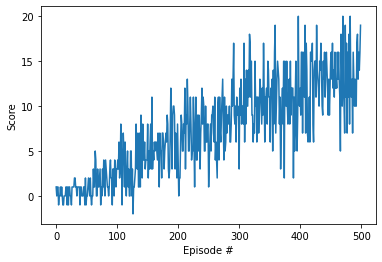

In [3]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='dqn')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


# Scenario 2 Double DQN with 2 hidden NN layers, 64 nodes, epsilon start 1.0, decay 0.995

Episode 50	Average Score: 0.426
Episode 100	Average Score: 1.12
Episode 150	Average Score: 2.88
Episode 200	Average Score: 4.83
Episode 250	Average Score: 6.31
Episode 300	Average Score: 8.08
Episode 350	Average Score: 9.91
Episode 400	Average Score: 11.15
Episode 450	Average Score: 12.64
Episode 464	Average Score: 13.05
Environment solved in 364 episodes!	Average Score: 13.05


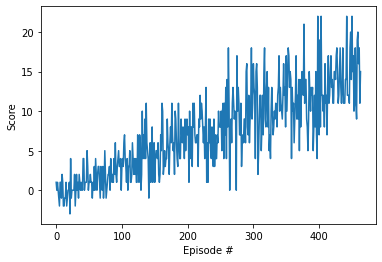

In [4]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='double_dqn')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 3 Dueling DQN with 2 hidden NN layers, 64 nodes, epsilon start 1.0, decay 0.995

Episode 50	Average Score: 0.52
Episode 100	Average Score: 1.06
Episode 150	Average Score: 2.65
Episode 200	Average Score: 4.14
Episode 250	Average Score: 5.94
Episode 300	Average Score: 8.20
Episode 350	Average Score: 9.42
Episode 400	Average Score: 11.28
Episode 449	Average Score: 13.02
Environment solved in 349 episodes!	Average Score: 13.02


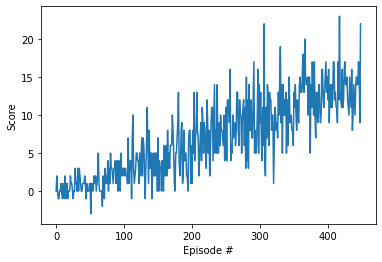

In [7]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='duel_dqn')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 4 DQN with 3 hidden NN layers, 128 nodes, epsilon start 1.0, decay 0.8

In [5]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.8, agent_type='dqn_layer'):

    if agent_type == "dqn_layer":
        from dqn_agent_dqn_add_layer import Agent
    elif agent_type == "double_dqn_layer":
        from dqn_agent_ddqn_add_layer import Agent   
    elif agent_type == 'duel_dqn_layer':
        from dqn_agent_duling_dqn_add_layer import Agent
    
    
    agent = Agent(state_size=state_size, action_size=action_size, seed=1)
    
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):
            action = np.int32(agent.act(state, eps)) # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished                      
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.001:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), agent_type + '_checkpoint.pth')
            break
    return scores


Episode 50	Average Score: 0.589
Episode 100	Average Score: 1.58
Episode 150	Average Score: 3.88
Episode 200	Average Score: 6.13
Episode 250	Average Score: 7.99
Episode 300	Average Score: 9.23
Episode 350	Average Score: 10.01
Episode 400	Average Score: 11.81
Episode 419	Average Score: 13.02
Environment solved in 319 episodes!	Average Score: 13.02


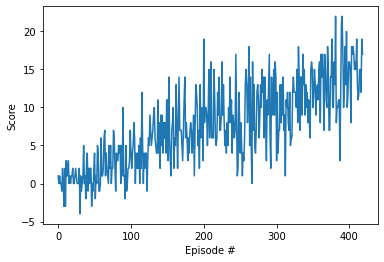

In [6]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.8, agent_type='dqn_layer')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 5 Double DQN with 3 hidden NN layers, 128 nodes, epsilon start 1.0, decay 0.8

Episode 50	Average Score: 1.349
Episode 100	Average Score: 3.03
Episode 150	Average Score: 6.33
Episode 200	Average Score: 8.65
Episode 250	Average Score: 10.98
Episode 300	Average Score: 11.80
Episode 350	Average Score: 12.07
Episode 373	Average Score: 13.01
Environment solved in 273 episodes!	Average Score: 13.01


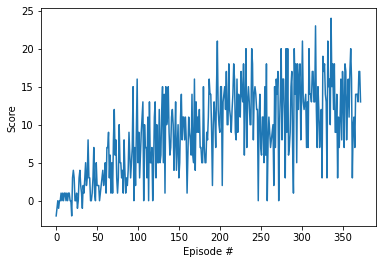

In [7]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.8, agent_type='double_dqn_layer')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 6 Dueling DQN with 3 hidden NN layers, 128 nodes, epsilon start 1.0, decay 0.8

Episode 50	Average Score: 2.108
Episode 100	Average Score: 3.82
Episode 150	Average Score: 7.34
Episode 200	Average Score: 9.63
Episode 250	Average Score: 10.70
Episode 300	Average Score: 11.86
Episode 348	Average Score: 13.02
Environment solved in 248 episodes!	Average Score: 13.02


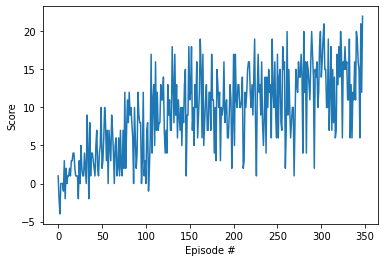

In [4]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.8, agent_type='duel_dqn_layer')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 7 DQN with 2 hidden NN layers, 64 nodes, epsilon start 1.0, decay 0.995, Prioritized Experience Replay 


In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, alpha1 =1, beta1 = 0.4, agent_type = "dqn_pr"):
    if agent_type == "dqn_pr":
        from dqn_agent_dqn_per import Agent
    elif agent_type == "double_dqn_pr":
        from dqn_agent_ddqn_per import Agent   
    elif agent_type == 'duel_dqn_pr':
        from dqn_agent_duling_dqn_per import Agent
        
    agent = Agent(state_size=state_size, action_size=action_size, seed=1)       
    
    """
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):
            action = np.int32(agent.act(state, eps)) # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished  
            alpha = alpha1 - (alpha1*t/max_t)
            beta = beta1 - (beta1*t/max_t)            
            agent.step(state, action, reward, next_state, done, alpha, beta) # learning step            
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.001:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), agent_type + '_checkpoint.pth')
            break
    return scores



Episode 50	Average Score: 0.40
Episode 100	Average Score: 0.71
Episode 150	Average Score: 2.10
Episode 200	Average Score: 4.50
Episode 250	Average Score: 6.54
Episode 300	Average Score: 7.61
Episode 350	Average Score: 8.70
Episode 400	Average Score: 9.52
Episode 450	Average Score: 10.17
Episode 500	Average Score: 11.72
Episode 550	Average Score: 12.56
Episode 576	Average Score: 13.04
Environment solved in 476 episodes!	Average Score: 13.04


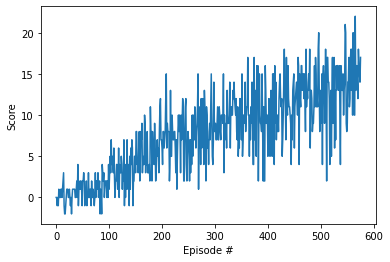

In [9]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='dqn_pr', alpha1 =1, beta1 = 0.4)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 8 Double DQN with 2 hidden NN layers, 64 nodes, epsilon start 1.0, decay 0.995, Prioritized Experience Replay

Episode 50	Average Score: 0.38
Episode 100	Average Score: 0.94
Episode 150	Average Score: 2.52
Episode 200	Average Score: 4.87
Episode 250	Average Score: 6.62
Episode 300	Average Score: 7.73
Episode 350	Average Score: 9.03
Episode 400	Average Score: 10.56
Episode 450	Average Score: 11.40
Episode 500	Average Score: 12.28
Episode 534	Average Score: 13.02
Environment solved in 434 episodes!	Average Score: 13.02


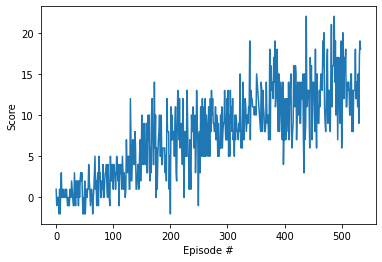

In [10]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='double_dqn_pr', alpha1 =1, beta1 = 0.4)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Scenario 9 Dueling DQN with 2 hidden NN layers, 64 nodes, epsilon start 1.0, decay 0.995, Prioritized Experience Replay

Episode 50	Average Score: 0.006
Episode 100	Average Score: 0.47
Episode 150	Average Score: 2.02
Episode 200	Average Score: 4.30
Episode 250	Average Score: 6.09
Episode 300	Average Score: 7.60
Episode 350	Average Score: 9.10
Episode 400	Average Score: 9.59
Episode 450	Average Score: 11.20
Episode 489	Average Score: 13.03
Environment solved in 389 episodes!	Average Score: 13.03


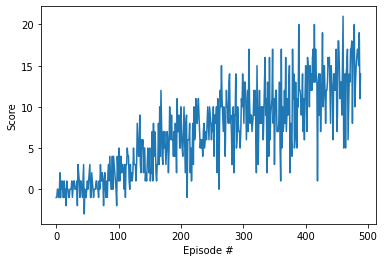

In [11]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, agent_type='duel_dqn_pr', alpha1 =1, beta1 = 0.4)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
env.close()